In [2]:
!pip install pandas_datareader
from pandas_datareader import data

In [3]:
# ライブラリの取得
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set(font="IPAexGothic",style="white")　多分いらなそう
# import oandapy
import configparser
import datetime
from datetime import datetime, timedelta

import warnings
warnings.simplefilter('ignore')

# CSVデータの読み込み
import os
working_directory=os.getcwd()
#print(working_directory)
# path_train=working_directory+'/train_finance.csv'
# path_test=working_directory+'/test_finance.csv'
# # path_test=working_directory+'/test_finance_last10elminate.csv'
# path_latest=working_directory+'/test_latest.csv'
# path_submit=working_directory+'/submit_finance.csv'

# #データフレームの生成
# df_train=pd.read_csv(path_train)
# df_test=pd.read_csv(path_test)
# df_latest=pd.read_csv(path_latest)
# df_submit=pd.read_csv(path_submit)

In [4]:
start='2019-06-01'
end='2020-06-01'

df=data.DataReader('^N225','yahoo',start,end)

In [5]:
df.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-06-03,20438.029297,20305.740234,20327.869141,20410.880859,67400000,20410.880859
2019-06-04,20464.570312,20289.640625,20435.859375,20408.539062,69200000,20408.539062
2019-06-05,20800.640625,20646.150391,20667.890625,20776.099609,72300000,20776.099609
2019-06-06,20842.279297,20745.839844,20745.839844,20774.039062,59600000,20774.039062
2019-06-07,20907.769531,20816.580078,20859.779297,20884.710938,50700000,20884.710938
2019-06-10,21166.119141,21077.949219,21095.400391,21134.419922,58200000,21134.419922
2019-06-11,21227.179688,21066.619141,21099.539062,21204.279297,52100000,21204.279297
2019-06-12,21259.699219,21118.750000,21130.390625,21129.720703,56500000,21129.720703
2019-06-13,21111.230469,20932.130859,21040.910156,21032.000000,65700000,21032.000000


In [6]:
df.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

In [7]:
df.index

DatetimeIndex(['2019-06-03', '2019-06-04', '2019-06-05', '2019-06-06',
               '2019-06-07', '2019-06-10', '2019-06-11', '2019-06-12',
               '2019-06-13', '2019-06-14',
               ...
               '2020-05-19', '2020-05-20', '2020-05-21', '2020-05-22',
               '2020-05-25', '2020-05-26', '2020-05-27', '2020-05-28',
               '2020-05-29', '2020-06-01'],
              dtype='datetime64[ns]', name='Date', length=242, freq=None)

In [8]:
date=df.index
price=df['Adj Close']

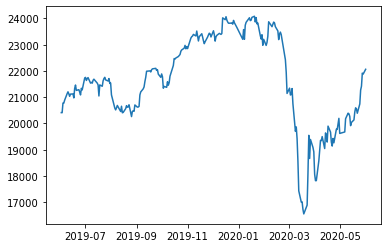

In [9]:
plt.plot(date,price)

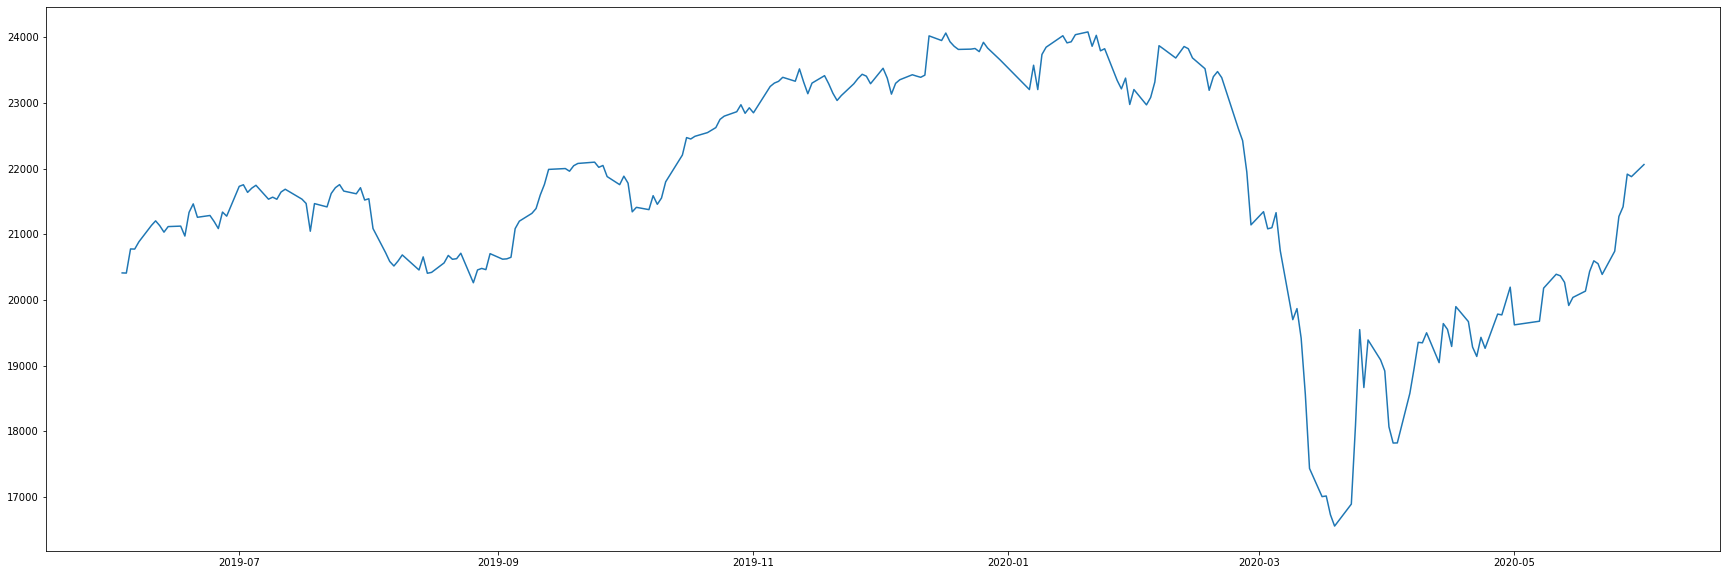

In [10]:
plt.figure(figsize=(30,10))
plt.plot(date,price)

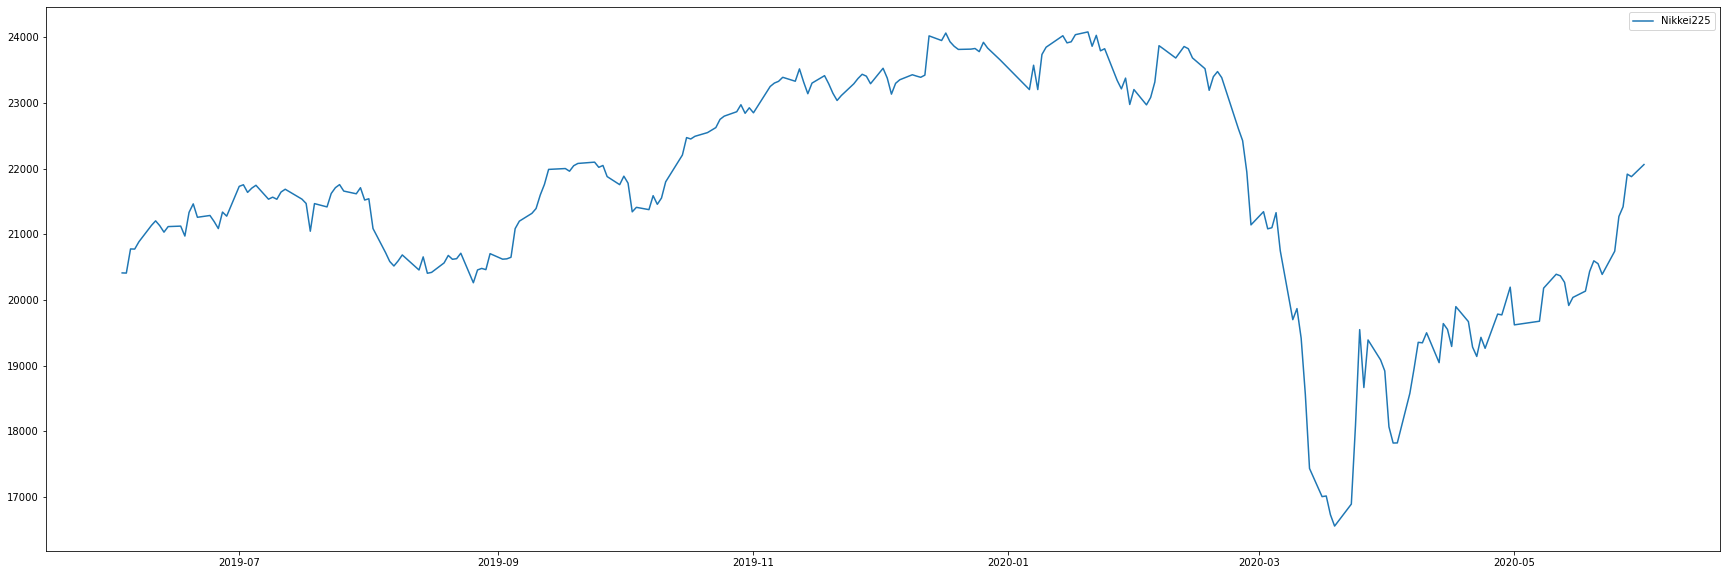

In [11]:
#凡例を付ける
plt.figure(figsize=(30,10))
plt.plot(date,price,label='Nikkei225')
plt.legend()

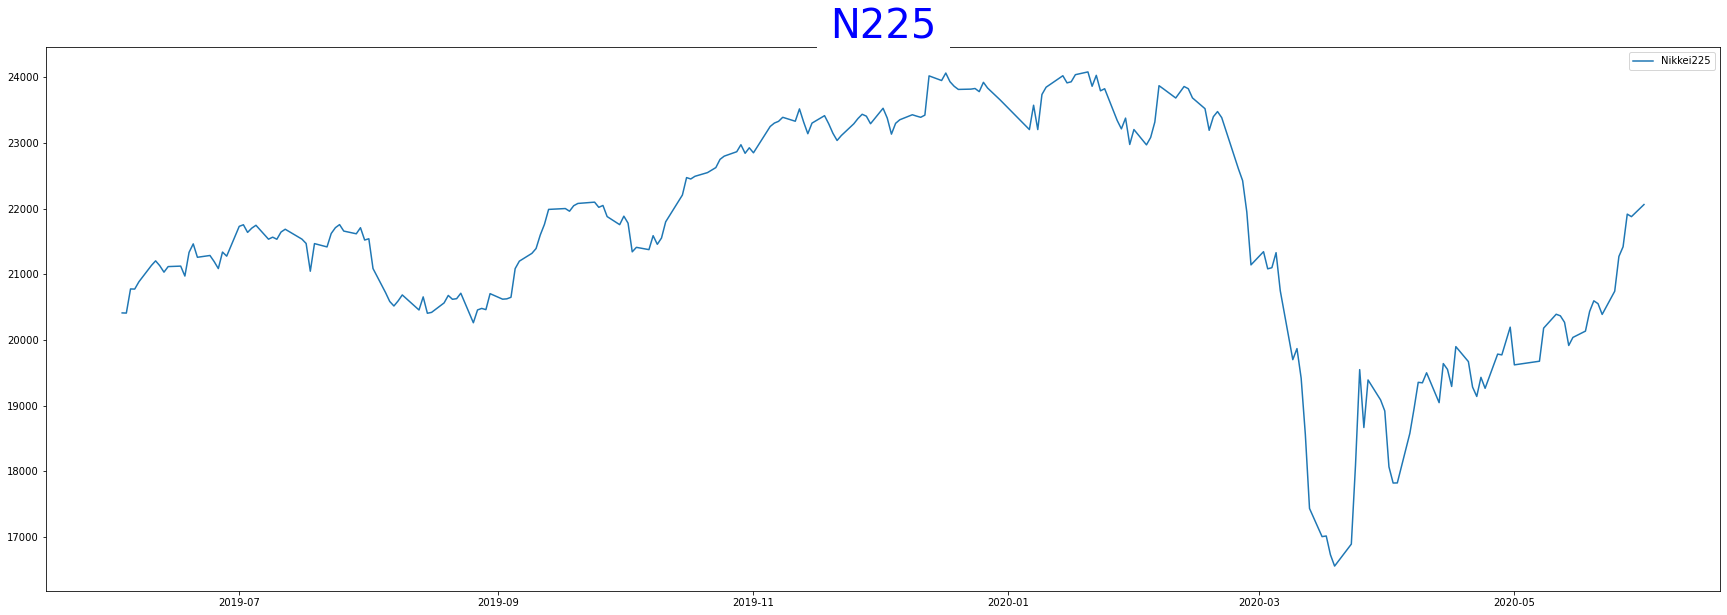

In [12]:
#タイトルをつける
plt.figure(figsize=(30,10))
plt.plot(date,price,label='Nikkei225')
plt.title('N225',color='blue',backgroundcolor='white',size=40,loc='center')
plt.legend()

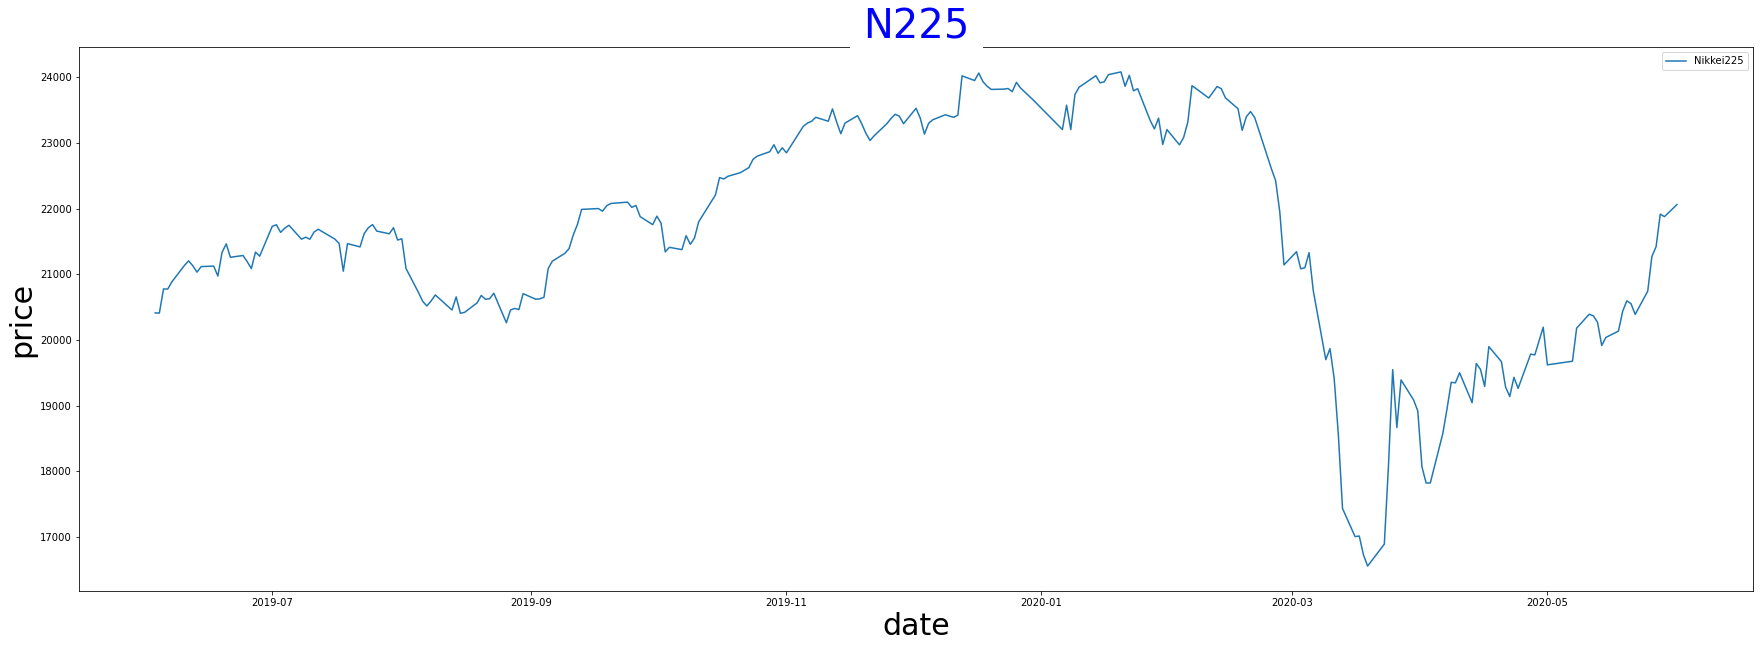

In [13]:
#タイトルをつける
plt.figure(figsize=(30,10))
plt.plot(date,price,label='Nikkei225')
plt.title('N225',color='blue',backgroundcolor='white',size=40,loc='center')
plt.xlabel('date',color='black',size=30)
plt.ylabel('price',color='black',size=30)
plt.legend()

In [14]:
span01=5
span02=25
span03=50

df['sma01']=price.rolling(window=span01).mean()
df['sma02']=price.rolling(window=span02).mean()
df['sma03']=price.rolling(window=span03).mean()

In [16]:
pd.set_option('display.max_rows',None)
df.head(51)

,High,Low,Open,Close,Volume,Adj Close,sma01,sma02,sma03
Date,,,,,,,,,
2019-06-03,20438.029297,20305.740234,20327.869141,20410.880859,67400000,20410.880859,NaN,NaN,NaN
2019-06-04,20464.570312,20289.640625,20435.859375,20408.539062,69200000,20408.539062,NaN,NaN,NaN
2019-06-05,20800.640625,20646.150391,20667.890625,20776.099609,72300000,20776.099609,NaN,NaN,NaN
2019-06-06,20842.279297,20745.839844,20745.839844,20774.039062,59600000,20774.039062,NaN,NaN,NaN
2019-06-07,20907.769531,20816.580078,20859.779297,20884.710938,50700000,20884.710938,20650.853906,NaN,NaN
2019-06-10,21166.119141,21077.949219,21095.400391,21134.419922,58200000,21134.419922,20795.561719,NaN,NaN
2019-06-11,21227.179688,21066.619141,21099.539062,21204.279297,52100000,21204.279297,20954.709766,NaN,NaN
2019-06-12,21259.699219,21118.750000,21130.390625,21129.720703,56500000,21129.720703,21025.433984,NaN,NaN
2019-06-13,21111.230469,20932.130859,21040.910156,21032.000000,65700000,21032.000000,21077.026172,NaN,NaN


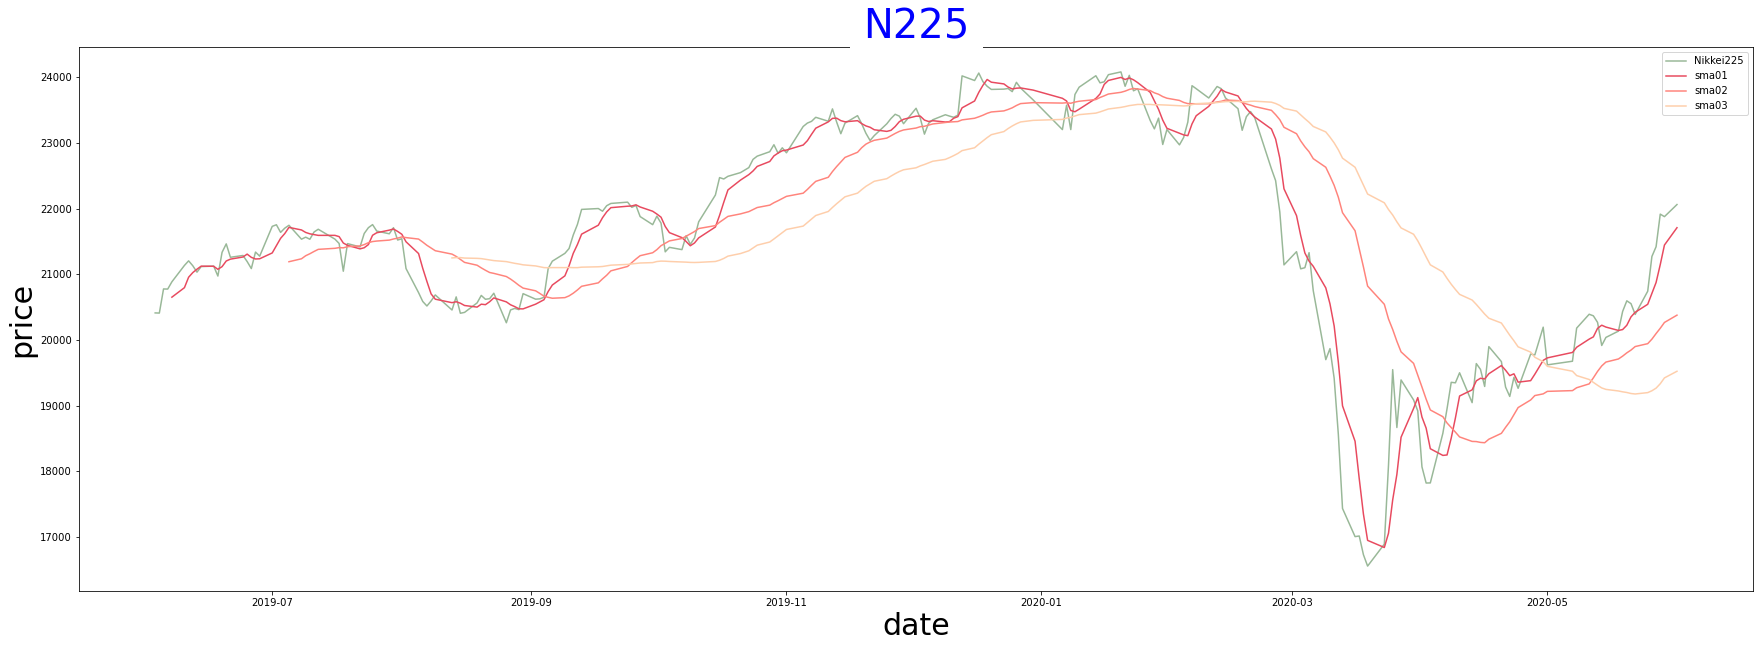

In [21]:
#線を加える
plt.figure(figsize=(30,10))
plt.plot(date,price,label='Nikkei225',color='#99b898')
plt.plot(date,df['sma01'],label='sma01',color='#e84a5f')
plt.plot(date,df['sma02'],label='sma02',color='#ff847c')
plt.plot(date,df['sma03'],label='sma03',color='#feceab')

plt.title('N225',color='blue',backgroundcolor='white',size=40,loc='center')
plt.xlabel('date',color='black',size=30)
plt.ylabel('price',color='black',size=30)
plt.legend()